In [7]:
import pandas as pd
import numpy as np

In [8]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud

In [10]:
# 정규표현식
import re

In [11]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [12]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-07 10:06:24.417138


'2025-01-07'

In [13]:
df = pd.read_csv(f'../stock/news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수,제목_명사,내용_명사
0,매일경제,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓","\n 사진 확대 삼성SDI 기흥사업장. [사진 = 삼성SDI] DS투자증권은 7일 삼성SDI에 대해 지난해 4분기 일회성 비용이 반영되면서 영업손실이 예상된다며 목표주가를 기존 52만원에서 39만원으로 하향 조정했다. 다만 투자의견은 ‘매수’를 유지했다.삼성SDI의 4분기 영업손실은 233억원으로 전년동기대비 적자전환하며 컨센서스(증권사 전망치 평균)를 하회할 것으로 전망했다. 같은 기간 매출액은 31.8% 감소한 3조8000억원으로 추정했다.중대형전지는 주요 고객사 부진으로 전분기 수준의 드론·친환경차(xEV) 출하량이 예상된다고 설명했다. 에너지저장장치(ESS) 호조는 지속돼 중대형전지 출하량 성장을 견인할 것으로 봤다. 소형전지는 리비안 물량 부재 외에도 전동공구와 IT향도 부진하며 출하량이 감소할 것으로 예상했다.여기에 일회성 비용 인식으로 중대형전지를 중심으로 마진율을 하향했다는 설명이다. 일회성 비용은 재고평가손실과 품질충당보증금 설정 등에 따라 약 1000억원 발생할 것으로 전망했다.삼성SDI의 고객사인 리비안이 올해 미국 인플레이션감축법(IRA) 보조금 대상 차종에서 제외된 점도 부담 요인으로 꼽았다. 3750달러 보조금의 부재는 리비안의 가격 경쟁력에 큰 부담이 될 전망이다. 원통형 전지 주 고객사가 리비안인 점을 감안하면 소형전지 출하량 회복이 지연될 수밖에 없다고 짚었다.최태용 DS투자증권 연구원은 “소형전지 중심으로 가동률 회복이 지연된 점을 반영해 실적 추정치를 하향했다”며 “트럼프 대통령 당선으로 업황 위축이 가시화하고 있다”고 말했다.최 연구원은 “첨단제조생산세액공제(AMPC)를 포함한 IRA 보조금 폐지 가능성은 불확실하지만, 예산 감축을 위한 보조금 축소는 예상 가능한 범위”라며 “전방 시장 둔화는 불가피하나 경쟁사 대비 AMPC 의존도가 낮은 점은 오히려 장점으로 부각될 수 있다”고 덧붙였다.\n",2025-01-07 08:25:11,36,932,7,185,삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,사진 확대 삼성 기흥 사업 사진 삼성 투자 증권 삼성 대해 지난해 회 비용 반영 영업 손실 예상 목표 주가 기존 하향 조정 다만 투자 의견 매수 를 유지 삼성 의 영업 손실 년 대비 컨센서스 증권사 망치 평균 를 회 것 전망 기간 매출 액 감소 추정 중대 전지 주요 고객 사 부진 분기 수준 드론 친환 경차 하량 예상 설명 에너지 저장장치 호조 지속 중대 전지 하량 성장 견인 것 소형 전지 리 물량 부재 외 공구 향 하량 감소 것 예상 여기 회 비용 인식 중대 전지 중심 마진 율 하향 설명 회 비용 재고 평가 손실 품질 충당 보증금 설정 등 약 발생 것 전망 삼성 의 고객 사인 리비 안이 올해 미국 인플레이션 감축 법 보조금 대상 차종 제외 점도 부담 요인 꼽았다 보조금 부재 리 가격 경쟁력 부담 전망 원통 전지 주 고객 사가 리 점 감안 소형 전지 하량 회복 지연 수 최태용 투자 증권 연구원 소형 전지 중심 가동 률 회복 지연 점 반영 실적 추정 하향 며 트럼프 대통령 당선 업황 위축 가시 고 말 최 연구원 첨단 생산 세액 공제 를 포함 보조금 폐지 가능성 예산 감축 위 보조금 축소 예상 범위 라며 전방 시장 둔화 경쟁 사 대비 의존 도 점 오히려 장점 부각 수 고


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_개수  100 non-null    int64 
 7   내용_토큰_개수  100 non-null    int64 
 8   제목_명사     100 non-null    object
 9   내용_명사     100 non-null    object
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [15]:
df['제목']

0                  “삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓
1          “수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑
2                    “휠라홀딩스, 부진은 지난해까지만…올해 실적·주가 반등 전망”
3            “주식 리포트, 그래도 여긴 볼 만 하네”…9년 연속 리서치 1등 증권사는?
4     AI 빅뱅 타고 텐배거 노린다···캐나다산 핵발전株 카메코[매일 돈이 보이는 습관 M+]
                            ...                        
95                 CES 젠슨황 연설 앞두고 반도체주 강세…'19만닉스' 회복 시도
96                        두산, 증권가 눈높이 상향에 '신고가'…30만원 목전
97                    화장품株, 수출액 사상 최대에 동반 강세…아모레퍼시픽 6%↑
98                      코스피, 개인 매수에 강보합 출발…'19만닉스' 회복할까
99                             국내 사모펀드에 팔리는 마녀공장…26% 급등
Name: 제목, Length: 100, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [18]:
cvect = CountVectorizer()
cvect_dtm = cvect.fit_transform(df['제목_명사'])
cvect_dtm

<100x413 sparse matrix of type '<class 'numpy.int64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [19]:
tvect = TfidfVectorizer()
tvect_dtm = tvect.fit_transform(df['제목_명사'])
tvect_dtm

<100x413 sparse matrix of type '<class 'numpy.float64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [20]:
cvect_dtm.toarray(), tvect_dtm.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.39500007],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [22]:
cvect.get_feature_names_out(), tvect.get_feature_names_out()

(array(['가능', '가시', '가지', '강보합', '강북', '강세', '강화', '개막', '개미', '개발', '개선',
        '개시', '개인', '개최', '개편', '거래', '거래소', '검사', '경신', '경영', '계속', '계좌',
        '고려', '고수', '고점', '곡물', '골든', '공매도', '공장', '과도', '관심', '관점', '광고비',
        '교보', '교육', '교체', '국내', '국민', '국민연금', '국채', '국토', '굴욕', '규모',
        '글로벌', '금리', '금융', '급등', '기대', '기대감', '기대치', '기록', '기반', '기수',
        '기술', '기술력', '기업', '기조연설', '기회', '김현석', '꼴찌', '나우', '난항', '날개',
        '네이버', '노크', '노후', '논의', '눈높이', '눈앞', '뉴욕', '능력', '니오', '닉스', '다음',
        '단기간', '단독', '달러', '달성', '당국', '대박', '대반', '대주주', '대통령', '대표',
        '도약', '도전', '돌입', '돌파', '동반', '두산', '디지털', '래프', '랜드마크', '랠리',
        '로봇', '리서치', '리튬', '리포트', '마감', '마녀', '마스턴', '마켓', '만료일', '매각',
        '매도', '매물', '매수', '매수세', '매일', '매출', '머니', '메리', '메카', '메코', '모건',
        '모빌리티', '모집', '목소리', '목전', '목표', '문제', '미국', '믹스', '밑돌', '바탕',
        '박스', '반도체', '반사', '발전', '발표', '방산', '방지', '배당', '배제', '밸류', '뱅크',
        '버스', '번호', '법인세', '베테랑', '보수', '보유', '복현'

In [23]:
df_cvect_dtm = pd.DataFrame(cvect_dtm.toarray(),columns=cvect.get_feature_names_out())
df_tvect_dtm = pd.DataFrame(tvect_dtm.toarray(),columns=tvect.get_feature_names_out())

In [24]:
df_cvect_dtm.shape, df_tvect_dtm.shape

((100, 413), (100, 413))

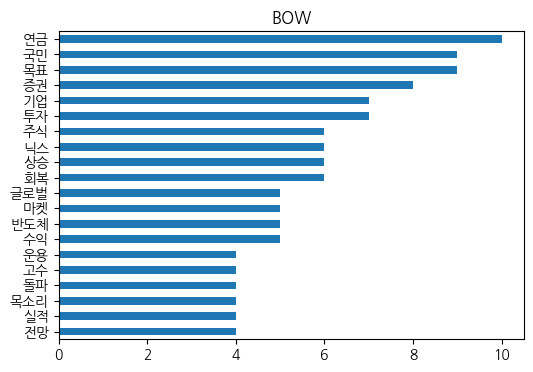

In [25]:
_ = df_cvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='BOW',figsize=(6,4))

<Axes: title={'center': 'TF-IDF 가중치 합'}>

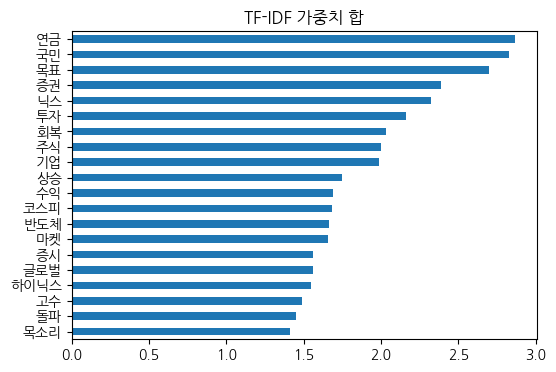

In [26]:
df_tvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='TF-IDF 가중치 합',figsize=(6,4))

In [27]:
def display_word_cloud(dict, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate_from_frequencies(dict)
    plt.figure(figsize=(6, 4))    
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return word_cloud

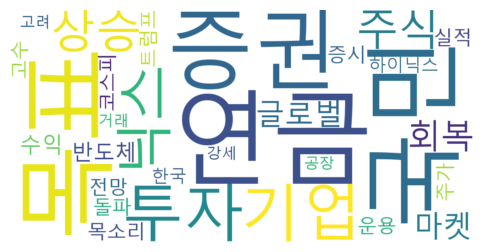

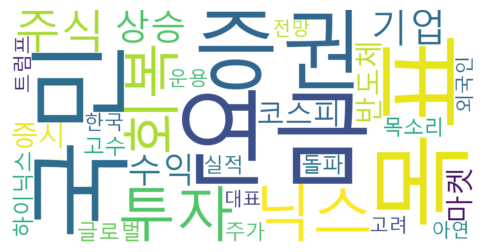

In [28]:
display_word_cloud(df_cvect_dtm.sum().nlargest(30).to_dict())
display_word_cloud(df_tvect_dtm.sum().nlargest(30).to_dict())

#### LDA(LatentDirichletAllocation) 토픽모델링

 - W : 문서-주제 행렬 (100,4)
 - H : 주제-단어 행렬 (4,409) 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
# n_components : 주제수
# 문서 X 주제
n_components = 3
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2025,doc_topic_prior=0.5,  topic_word_prior=0.5)
cvect_W = LDA_model.fit_transform(df_cvect_dtm) 
print(cvect_W.shape)
cvect_W

(100, 3)


array([[0.87031737, 0.06187464, 0.06780799],
       [0.07720737, 0.83987174, 0.08292088],
       [0.06355856, 0.05843741, 0.87800404],
       [0.06947395, 0.07484998, 0.85567606],
       [0.06994512, 0.06895399, 0.8611009 ],
       [0.08560657, 0.84060329, 0.07379015],
       [0.05682897, 0.8821785 , 0.06099252],
       [0.05191361, 0.89563554, 0.05245085],
       [0.05980552, 0.13508259, 0.80511189],
       [0.07995376, 0.08332221, 0.83672403],
       [0.05455921, 0.53784686, 0.40759393],
       [0.65942853, 0.06333398, 0.27723748],
       [0.09409821, 0.81242056, 0.09348122],
       [0.0930871 , 0.09166617, 0.81524673],
       [0.14823947, 0.69884134, 0.15291919],
       [0.15143788, 0.17602234, 0.67253979],
       [0.7072642 , 0.1461326 , 0.1466032 ],
       [0.06508215, 0.06070371, 0.87421413],
       [0.11560544, 0.11433428, 0.77006028],
       [0.07482718, 0.07192098, 0.85325184],
       [0.91024314, 0.04478548, 0.04497138],
       [0.06811781, 0.06743   , 0.86445219],
       [0.

In [31]:
# 문서의 주제 확률값의 합은 1
cvect_W.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
# 주제 X 단어
cvect_H = LDA_model.components_
print(cvect_H.shape)
cvect_H

(3, 413)


array([[0.50449971, 0.50620239, 0.50592618, ..., 1.49446401, 1.48374266,
        0.50465847],
       [1.49109094, 1.48998135, 1.48931155, ..., 0.502569  , 0.50756856,
        0.50280734],
       [0.50440936, 0.50381626, 0.50476227, ..., 0.50296699, 0.50868878,
        1.49253419]])

In [35]:
# 문서 X 주제 데이터프레임
df_cvect_W = pd.DataFrame(cvect_W)
df_cvect_W['제목'] = df['제목']
df_cvect_W['제목_명사'] = df['제목_명사']
df_cvect_W

,0,1,2,제목,제목_명사
0,0.870317,0.061875,0.067808,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표
1,0.077207,0.839872,0.082921,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표
2,0.063559,0.058437,0.878004,"“휠라홀딩스, 부진은 지난해까지만…올해 실적·주가 반등 전망”",휠라 홀딩스 부진 지난해 올해 실적 주가 반 등 전망
3,0.069474,0.074850,0.855676,"“주식 리포트, 그래도 여긴 볼 만 하네”…9년 연속 리서치 1등 증권사는?",주식 리포트 여긴 만 년 연속 리서치 등 증권사
4,0.069945,0.068954,0.861101,AI 빅뱅 타고 텐배거 노린다···캐나다산 핵발전株 카메코[매일 돈이 보이는 습관 M+],빅뱅 텐 배 거 캐나다 핵 발전 株 카 메코 매일 돈 습관
...,...,...,...,...,...
95,0.060768,0.868733,0.070498,CES 젠슨황 연설 앞두고 반도체주 강세…'19만닉스' 회복 시도,젠슨황 연설 반도체 주 강세 만 닉스 회복 시도
96,0.070483,0.855501,0.074016,"두산, 증권가 눈높이 상향에 '신고가'…30만원 목전",두산 증권가 눈높이 상향 신고 만 원 목전
97,0.055272,0.058522,0.886206,"화장품株, 수출액 사상 최대에 동반 강세…아모레퍼시픽 6%↑",화장품 株 수출액 사상 최대 동반 강세 아모레 퍼시픽
98,0.061004,0.083038,0.855958,"코스피, 개인 매수에 강보합 출발…'19만닉스' 회복할까",코스피 개인 매수 강보합 출발 만 닉스 회복


In [36]:
# 1번 주제 확률이 높은 상위 5개 문서 보기
df_cvect_W.sort_values(by=1,ascending=False).head(5)

,0,1,2,제목,제목_명사
47,0.039378,0.917612,0.043010,"[MK시그널] 유니드, 트럼프 2기 탄소포집 시장 확대 전망에 주가 상승세…MK시그널 추천 후 상승률 6.17% 기록",시그널 유니 드 트럼프 기 탄소 포집 시장 확대 전망 주 상승세 시그널 추천 후 상승 기록
31,0.051037,0.899576,0.049387,"AI기반 2차전지 검사전문 기업 피아이이, 2월 코스닥 입성 도전",기반 차 전지 검사 전문 기업 피아 이이 월 코스닥 입 도전
78,0.050508,0.898883,0.050609,"교보증권, 자립준비청년 지원 프로그램 '드림업' 새 기수 선발",교보 증권 자립 준비 청년 지원 프로그램 업 기수 선발
86,0.054366,0.896270,0.049365,"'코스닥 노크' 피아이이 ""AI SW 기술력 강화해 글로벌 기업 도약""",코스닥 노크 피아 이이 기술력 강화 글로벌 기업 도약
7,0.051914,0.895636,0.052451,"[단독] “이봐, 문제는 수익률이야”…요즘 기업 주총장서 가장 목소리 크다는 이 큰손",단독 문제 수익 요즘 기업 주총 장서 목소리 큰손


In [37]:
# 주제 X 단어
df_cvect_lda_topic = pd.DataFrame(cvect_H, columns=cvect.get_feature_names_out())
df_cvect_lda_topic

,가능,가시,가지,강보합,강북,강세,강화,개막,개미,개발,개선,개시,개인,개최,개편,거래,거래소,검사,경신,경영,계속,계좌,고려,고수,고점,곡물,골든,공매도,공장,과도,관심,관점,광고비,교보,교육,교체,국내,국민,국민연금,국채,국토,굴욕,규모,글로벌,금리,금융,급등,기대,기대감,기대치,기록,기반,기수,기술,기술력,기업,기조연설,기회,김현석,꼴찌,나우,난항,날개,네이버,노크,노후,논의,눈높이,눈앞,뉴욕,능력,니오,닉스,다음,단기간,단독,달러,달성,당국,대박,대반,대주주,대통령,대표,도약,도전,돌입,돌파,동반,두산,디지털,래프,랜드마크,랠리,로봇,리서치,리튬,리포트,마감,마녀,마스턴,마켓,만료일,매각,매도,매물,매수,매수세,매일,매출,머니,메리,메카,메코,모건,모빌리티,모집,목소리,목전,목표,문제,미국,믹스,밑돌,바탕,박스,반도체,반사,발전,발표,방산,방지,배당,배제,밸류,뱅크,버스,번호,법인세,베테랑,보수,보유,복현,본격,본더,본부,부자,부진,분기,분쟁,불기둥,불법,브리핑,비결,비디아,비용,비츠,비트코인,빅뱅,사고,사모,사법,사상,삼성,삼성전자,삼성증권,삼전,상승,상승세,상품,상향,서비스,서울,선물,선발,선택,성과,성장,세계,세미나,세탁,센서스,소식,속도,손절,쇼핑,수강,수수료,수요,수익,수장,수지,수출액,순식간,순항,습관,시그널,시대,시도,시작,시장,신고,신사업,신임,신한,신호,실시간,실적,쌍둥이,아모레,아연,안정,액티브,야외,약세,양자,얼마,업무,업체,에너지,엔터,여긴,역대,연금,연동,연설,연속,연일,연패,열쇠,영업,영향력,예고,예상,오늘,오세훈,오피스,오해,올해,옵션,와중,외국,외국인,외인,외환,요즘,우리,우원식,운영,운용,워치,월가,월스트리트,위법,위안,위업,위축,유니,은행,의결권,이것,이벤트,이이,이익,이재명,인공지능,인하,일정,일확,일회성,자금,자립,자산,자율,자체,장서,장성,장성은,장중,장터,재료,재선,적자,전략,전력,전망,전문,전자,전지,전환,전횡,절차,정기,정도,정체,제도,제조,제휴,젠슨,젠슨황,조선,조선주,조직,존재감,종목,주가,주식,주주,주총,주행,준비,중국,증권,증권가,증권사,증설,증시,지금,지급,지난해,지노,지분,지수,지원,지주사,직장인,진실,집합,책자,천보,청년,체계,체포영장,최고,최고가,최대,최윤범,최태원,추천,출발,칼럼,캐나다,커지,컨퍼런스,케어,코리아,코스,코스닥,코스피,코앞,코웨이,코인,큐어,크로스,큰손,탄소,테마,테마주,토스,투심,투자,트럼프,특징,파생,파트너,패닉,퍼시픽,펀드,포시,포집,포착,포커스,포토,폭발,폭스콘,표주,풍년,프로그램,플라스틱,피아,핀테크,하나,하닉,하락,하이닉스,하회,한경,한국,한미,한파,한화,할인,해외,핵심,행사,헬스,현대,협업,형제,호실,호황,홀딩스,화장품,확대,환원,환율,환호,활약,회복,회장,효과,훈풍,휠라
0,0.504500,0.506202,0.505926,0.503807,0.503317,0.508785,1.512985,0.505879,0.505325,0.503317,1.494082,0.505458,0.503807,0.504917,1.495515,3.494502,0.503873,0.503513,0.505570,0.502830,0.503252,2.494299,0.504573,0.507101,0.506832,1.489033,0.505378,1.493640,0.504642,1.447146,1.491841,0.506269,1.486236,0.504234,1.496787,0.505451,0.504827,0.580071,0.504074,2.495065,0.503786,0.504382,0.503317,2.435550,0.504077,0.504862,0.505467,2.545746,0.503807,0.506269,0.502833,0.503513,0.503430,0.512297,0.504097,1.167564,1.491841,0.506832,1.493321,0.504382,1.493321,0.505451,0.508268,0.504700,0.504097,1.507930,0.503786,0.505183,0.515660,0.503252,0.505672,0.504654,0.512376,1.491054,0.505166,0.508037,0.504460,0.503797,0.504144,1.495258,0.504382,1.447146,0.504278,0.525504,0.504097,0.503513,0.503786,1.484997,0.503334,0.506172,1.495314,0.505672,0.503317,0.503252,1.494464,0.504969,1.495525,0.504401,1.496787,0.504362,2.495392,1.472875,0.505249,0.503664,0.507528,0.504442,0.510144,0.510050,0.504576,1.512798,0.504077,2.495065,1.492991,0.504443,1.495069,1.495314,1.496787,0.508814,0.505183,2.515984,0.503682,1.495558,0.505378,0.504601,0.505672,0.509106,0.508619,0.503688,0.504443,0.508226,1.495525,1.496787,0.504077,0.503688,0.506830,0.505458,1.489033,1.493640,0.504500,0.511269,0.506269,0.50685,0.504278,0.503317,0.504987,0.505451,1.495258,0.509408,1.521266,0.502830,0.503807,1.493640,0.503252,1.495258,1.494273,1.493783,1.495525,0.504460,0.504443,1.494835,0.504362,0.504278,0.503334,1.523047,0.507442,0.505458,0.505203,1.228260,0.502833,0.508683,0.513409,2.556728,0.503317,0.503180,0.504234,0.504203,0.505166,0.505672,0.504382,0.504917,1.496787,1.481493,0.503664,1.495525,0.505325,0.506524,1.496787,0.503180,0.506739,0.509567,0.505451,1.494583,0.503334,0.505325,0.507411,0.504443,0.503259,0.504500,0.504191,1.495558,0.506339,0.505183,1.495525,0.511166,0.504077,0.503797,2.495065,0.507210,1.494583,0.503334,0.504573,1.494583,0.504077,1.486236,0.50294,2.488881,0.502830,1.496787,0.504322,0.506060,2.493919,0.504401,0.506830,1.743689,0.50294,0.504191,0.504401,0.505570,0.505269,0.505926,0.506269,0.506850,1.482853,1.525684,0.508904,0.505249,0.503317,0.503873,1.492165,0.503180,0.507697,0.506850,0.506771,0.507697,0.50294,0.503682,1.491054,0.505249,0.505672,1.499398,0.50294,0.506060,1.493321,0.503786,0.50294,0.505269,0.506202,0.502833,0.503786,0.505291,2.490605,0.503180,0.503910,0.503688,0.505249,1.491054,0.504500,0.508904,1.495258,1.493783,1.496787,0.504234,0.505451,1.494464,0.503786,0.503682,0.515194,0.511166,1.492255,0.504322,0.509106,0.506202,1.494583,0.504917,1.482853,0.507610,0.503513,0.505866,1.503702,0.503807,1.447146,0.504278,1.495515,0.504074,0.504654,1.4

In [339]:
# 첫번째 주제와 연관성 있는 상위 30개 단어
df_cvect_lda_topic.loc[0].nlargest(30)

개미      1.994214
개발      1.730019
공매도     1.730019
시스템     1.730019
완료      1.730019
          ...   
중앙      1.022032
테스트     1.022032
채권      1.014887
비트코인    1.008909
主食      0.994717
Name: 0, Length: 30, dtype: float64

<Axes: >

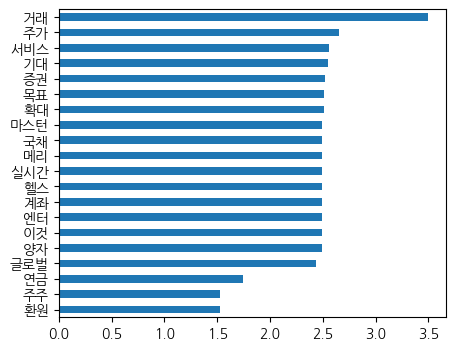

In [38]:
# 첫번째 주제와 연관성 있는 상위 20개 단어 - 시각화(바차트)
df_cvect_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh(figsize=(5,4))

In [39]:
# 주제별로 상위 키워드를 막대그래프로 시각화합니다.
# model - LDA모델
# feature_names - 단어
# n_top_words - 주제와 연관된 상위 단어
# title - 그래프 제목 
# n_topics - 주제 수
def plot_top_words(model, feature_names, n_top_words, title, n_topics=5):    
    
    df_topic = pd.DataFrame(model.components_, columns=feature_names)
    
    fig, axes = plt.subplots(1, n_topics, figsize=(4 * n_topics, 12), sharex=True)
    axes = axes.flatten()

    for topic_idx in df_topic.index:
        ax = axes[topic_idx]
        df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
        ax.invert_yaxis()
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 20})
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right".split():
            ax.spines[i].set_visible(False)

        fig.suptitle(title, fontsize=30)
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

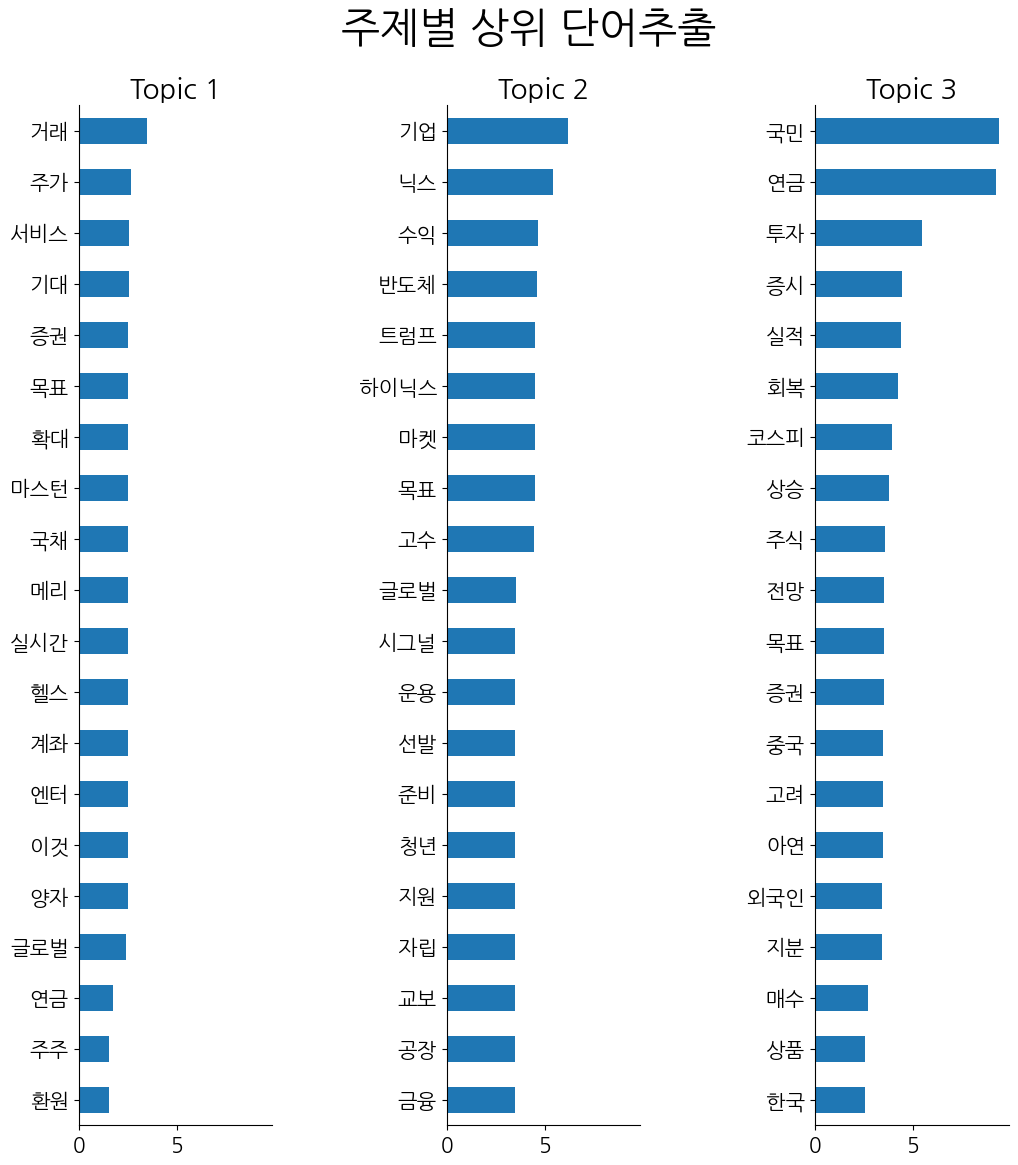

In [40]:
plot_top_words(LDA_model,cvect.get_feature_names_out(),20,'주제별 상위 단어추출',n_components)

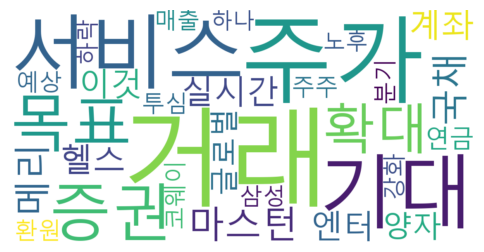

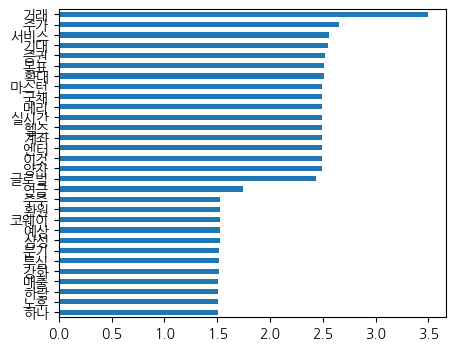

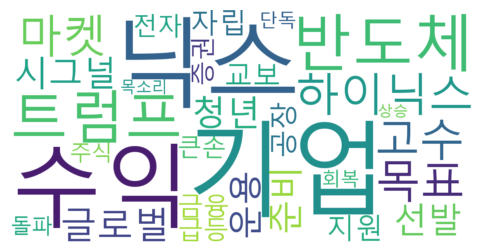

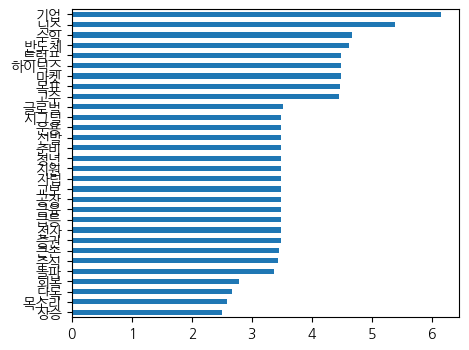

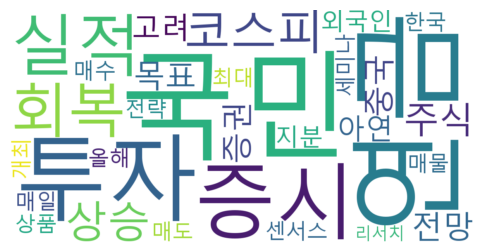

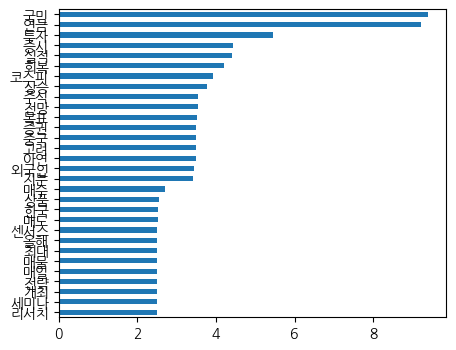

In [41]:
for idx in range(n_components) :
    display_word_cloud(df_cvect_lda_topic.loc[idx].to_dict(),30)
    df_cvect_lda_topic.loc[idx].nlargest(30).sort_values(ascending=True).plot.barh(figsize=(5,4))